## Instructions






Perform a linear regression using the Auto MPG dataset (loaded for you in the setup section).

Incorporate the following aspects:

  1. Data
     + Load the data.
     + Explore the data, including distributions, correlation, etc. Make plots.
     + Check for null values. Handle null values by dropping or imputing.
     + Choose target and feature(s).
     + Encode features as necessary (ordinal vs one-hot).
     + Scale / normalize features as necessary.
     + Split into train and test sets (specifically 80/20 split). Remember to use a random seed to ensure your results are reproducible.
  2. Model
     + Use a `LinearRegression` model from sklearn.
     + Train the model using the training data.
     + Inspect artifacts from the training process:
       + Print the model's coeficients and intercept (i.e. line of best fit).
       + Inspect the coefficients by wrapping them in a pandas Series and labeling them with their corresponding feature names, then sort them in descending order.
       + Interpret the coefficients - which features contribute most to our model's predictive ability? Write your answer in a text cell.
  3. Evaluation
     + Make predictions for the test set.
     + Evaluate the results using sklearn regression metrics, specifically the r-squared score and mean squared error (MSE). Calculate the Root Mean Squared Error (RMSE) as well, based on the MSE. Interpret the results - how well did the model do? Answer in a text cell.




## Setup

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
%%capture
!pip install ucimlrepo

## Data Loading


### Auto MPG Dataset

https://archive.ics.uci.edu/dataset/9/auto+mpg

The Auto MPG dataset provides information about automobile fuel efficiency, in terms of miles per gallon (MPG).

We'll be using a version of this dataset hosted by UCI. They have a great repository of machine learning datasets, and now a cool new website and python package we can use to load the data easily:


In [ ]:
from ucimlrepo import fetch_ucirepo

repo = fetch_ucirepo(id=9)
print(type(repo)) # assuming this is dictionary-like


<class 'ucimlrepo.dotdict.dotdict'>


In [ ]:
repo.keys()

dict_keys(['data', 'metadata', 'variables'])

Repo has data, metadata (dataset description), and variables (data dictionary of sorts).

In [ ]:
repo.metadata

{'uci_id': 9,
 'name': 'Auto MPG',
 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg',
 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv',
 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption',
 'area': 'Other',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 398,
 'num_features': 7,
 'feature_types': ['Real', 'Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['mpg'],
 'index_col': ['car_name'],
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1993,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5859H',
 'creators': ['R. Quinlan'],
 'intro_paper': None,
 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had 

In [ ]:
repo.variables

,name,role,type,demographic,description,units,missing_values
0,displacement,Feature,Continuous,None,None,None,no
1,mpg,Target,Continuous,None,None,None,no
2,cylinders,Feature,Integer,None,None,None,no
3,horsepower,Feature,Continuous,None,None,None,yes
4,weight,Feature,Continuous,None,None,None,no
5,acceleration,Feature,Continuous,None,None,None,no
6,model_year,Feature,Integer,None,None,None,no
7,origin,Feature,Integer,None,None,None,no
8,car_name,ID,Categorical,None,None,None,no


We see the target is "mpg" and there are a number of features - some continuous, some categorical. We'll need to further investigate and decide how to encode the categorical features.

We see there are some missing values in the "horsepower" column. We'll need to handle them later.

Finally, here is our dataset:

In [ ]:
#auto_mpg.data.keys()

In [ ]:
#print(type(auto_mpg.data.features))
#print(type(auto_mpg.data.targets))
#print(type(auto_mpg.data.ids))

In [ ]:
df = repo.data.original
df.head()

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0


What's the "origin" feature about?

One can possibly interpret from the car names, or consult various [internet](https://rstudio-pubs-static.s3.amazonaws.com/516461_09a0ec8250df45c4bb362c97ad7fd965.html) [resources](https://www.kaggle.com/code/asokraju/auto-mpg-dataset), that mention the following mapping: (1: USA, 2: Europe, 3: Asia).

In [ ]:
#df[df["origin"] == 1]["car_name"] # north american cars
#df[df["origin"] == 2]["car_name"] # european cars
df[df["origin"] == 3]["car_name"] # japanese / asian cars

,car_name
14,"toyota,corona,mark,ii"
18,"datsun,pl510"
29,"datsun,pl510"
31,"toyota,corona"
53,"toyota,corolla,1200"
...,...
382,"toyota,corolla"
383,"honda,civic"
384,"honda,civic,(auto)"
385,"datsun,310,gx"


In [ ]:
ORIGINS_MAP = {1: "usa", 2: "europe", 3: "asia"}


# todo: map and one-hot encode the origin

## Solution

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (398, 9)


,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0


### Data Exploration and Preprocessing

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      398 non-null    object 
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None


In [ ]:
print(df.describe())

        cylinders  displacement  horsepower       weight  acceleration  \
count  398.000000    398.000000  392.000000   398.000000    398.000000   
mean     5.454774    193.425879  104.469388  2970.424623     15.568090   
std      1.701004    104.269838   38.491160   846.841774      2.757689   
min      3.000000     68.000000   46.000000  1613.000000      8.000000   
25%      4.000000    104.250000   75.000000  2223.750000     13.825000   
50%      4.000000    148.500000   93.500000  2803.500000     15.500000   
75%      8.000000    262.000000  126.000000  3608.000000     17.175000   
max      8.000000    455.000000  230.000000  5140.000000     24.800000   

       model_year      origin         mpg  
count  398.000000  398.000000  398.000000  
mean    76.010050    1.572864   23.514573  
std      3.697627    0.802055    7.815984  
min     70.000000    1.000000    9.000000  
25%     73.000000    1.000000   17.500000  
50%     76.000000    1.000000   23.000000  
75%     79.000000    2.00

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"Total missing values: {df.isnull().sum().sum()}")

horsepower    6
dtype: int64
Total missing values: 6


#### Distribution Analysis

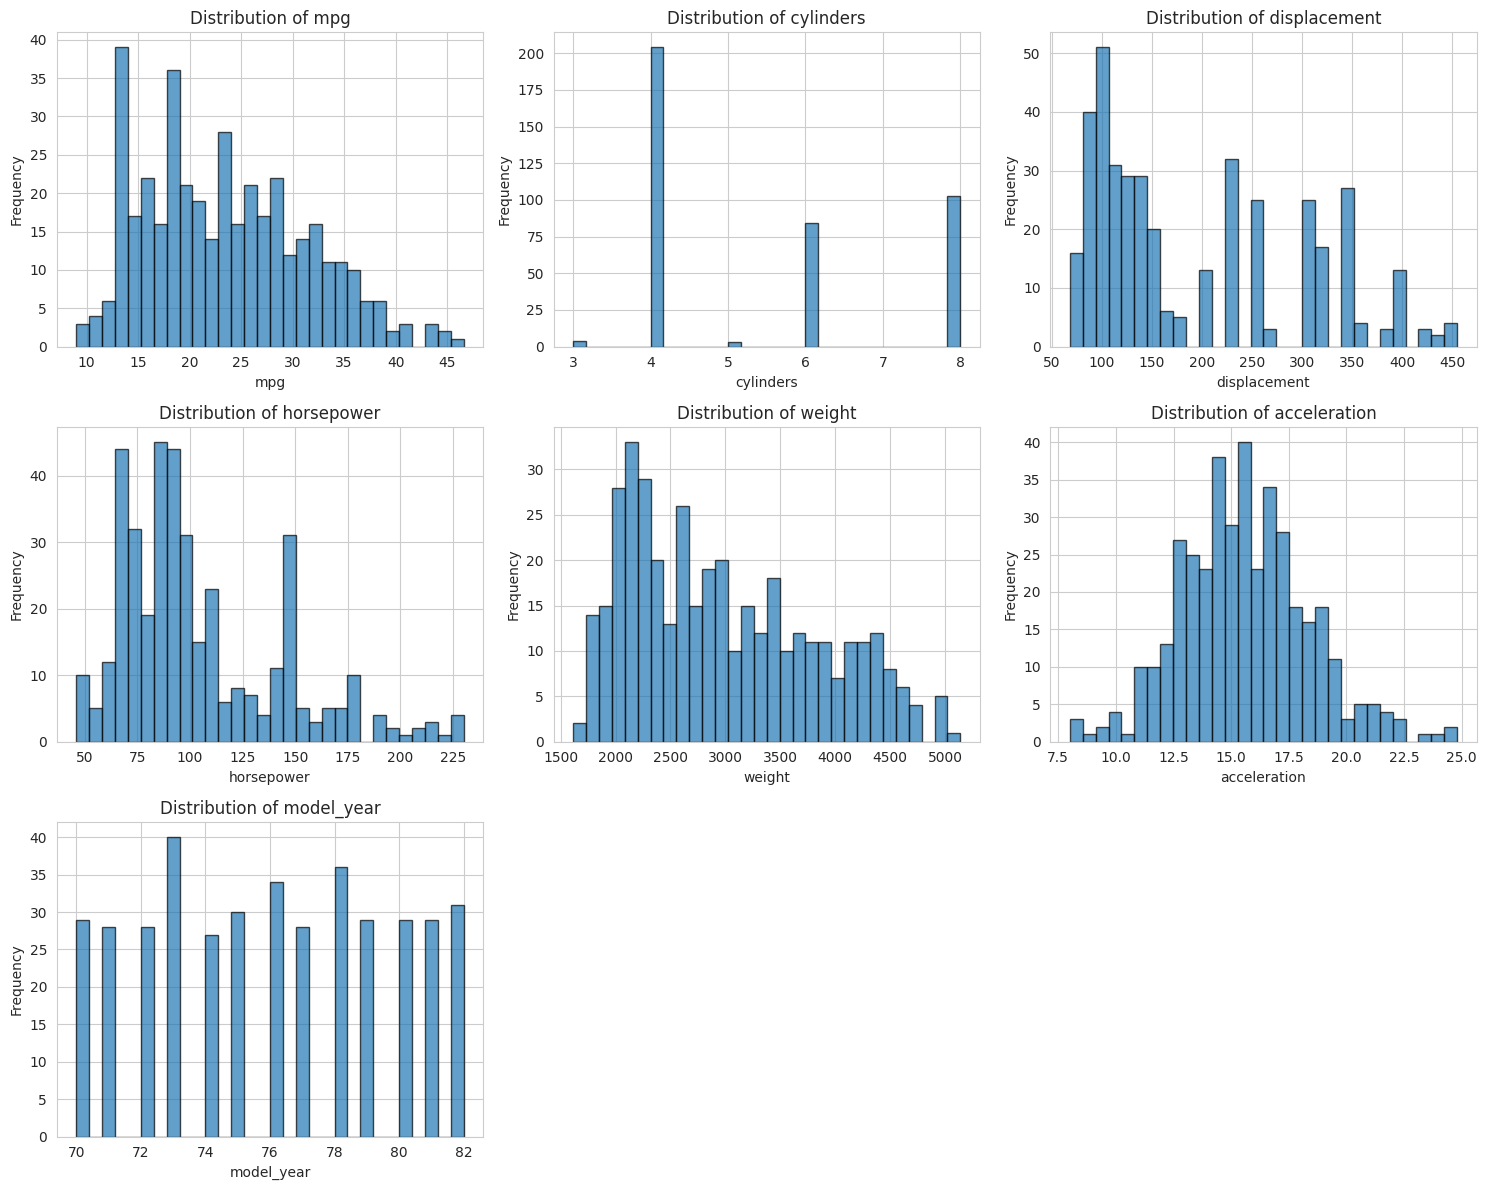

In [ ]:
# Visualizing the distributions of numerical features
numerical_cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
                  'weight', 'acceleration', 'model_year']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Remove extra subplots
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

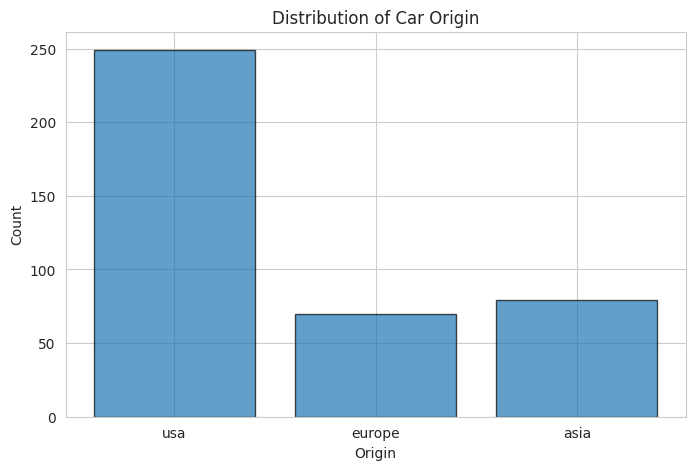

In [ ]:
# Visualize distribution of origin
plt.figure(figsize=(8, 5))
origin_counts = df['origin'].value_counts().sort_index()
origin_labels = [ORIGINS_MAP[i] for i in origin_counts.index]
plt.bar(origin_labels, origin_counts.values, edgecolor='black', alpha=0.7)
plt.title('Distribution of Car Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()

#### Correlation Analysis

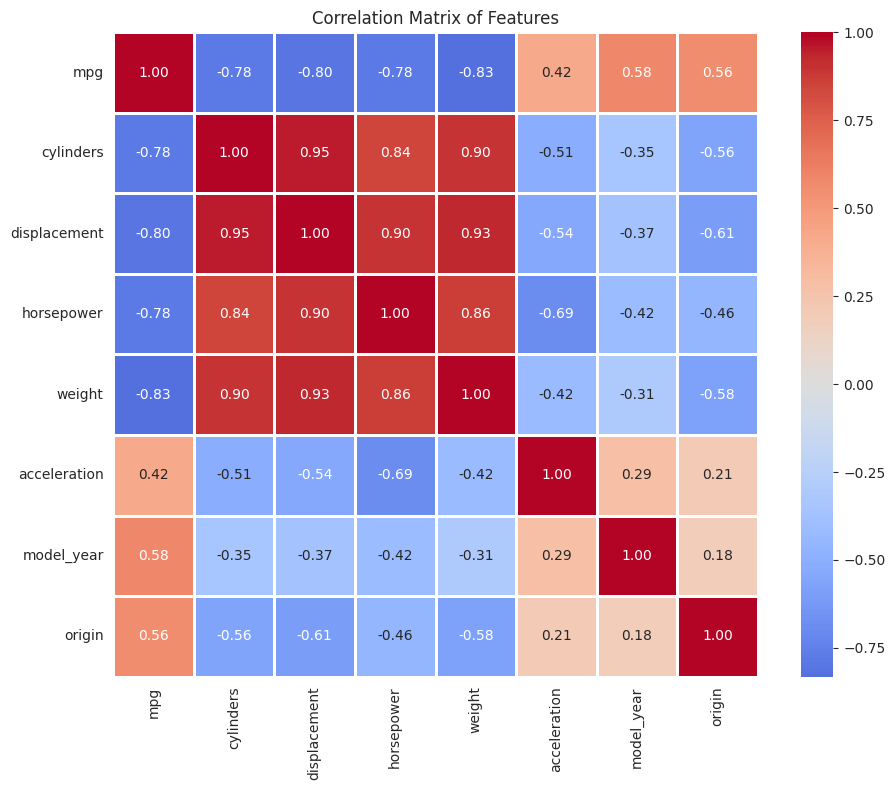

In [ ]:
# Calculate correlation matrix
correlation_cols = ['mpg', 'cylinders', 'displacement', 'horsepower',
                    'weight', 'acceleration', 'model_year', 'origin']
correlation_matrix = df[correlation_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [ ]:
# Display correlations with target variable (mpg)
print("Correlations with MPG:")
print(correlation_matrix['mpg'].sort_values(ascending=False))

Correlations with MPG:
mpg             1.000000
model_year      0.579267
origin          0.563450
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


#### Scatter Plots

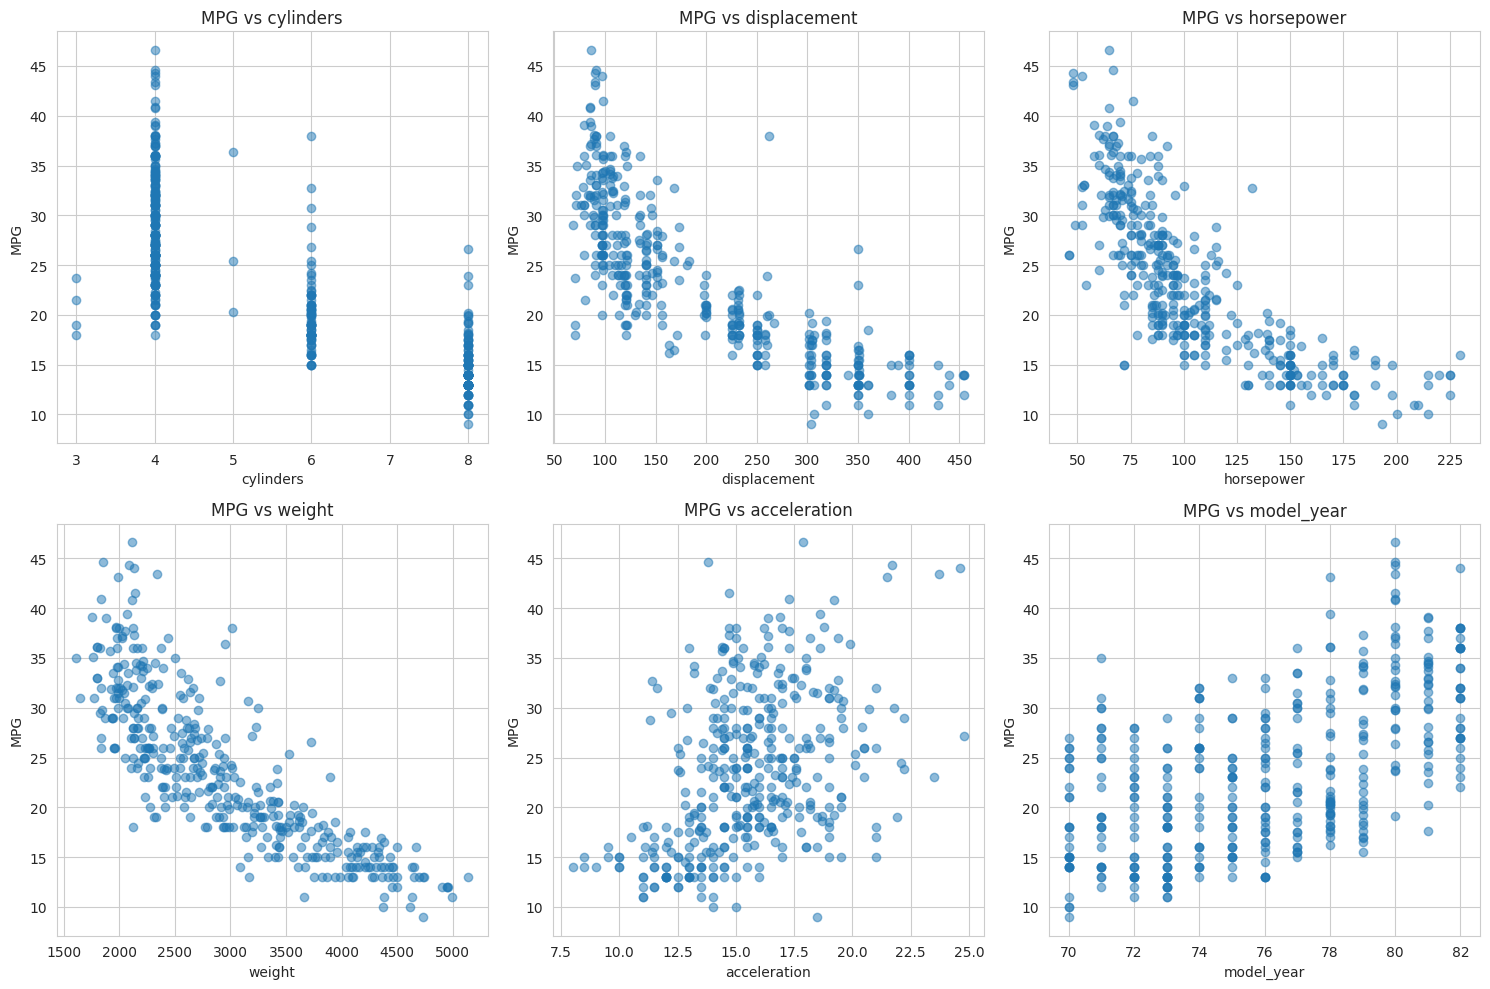

In [ ]:
# Scatter plots of features vs MPG
feature_cols = ['cylinders', 'displacement', 'horsepower',
                'weight', 'acceleration', 'model_year']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(feature_cols):
    axes[idx].scatter(df[col], df['mpg'], alpha=0.5)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('MPG')
    axes[idx].set_title(f'MPG vs {col}')

plt.tight_layout()
plt.show()

#### Handling Missing Values

In [ ]:
# Check missing values
print("Before handling missing values:")
print(f"Shape: {df.shape}")
print(f"Missing values in horsepower: {df['horsepower'].isnull().sum()}")

# Drop rows with missing values
df_clean = df.dropna()

print("\nAfter handling missing values:")
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")

Before handling missing values:
Shape: (398, 9)
Missing values in horsepower: 6

After handling missing values:
Shape: (392, 9)
Missing values: 0


#### One-hot encode

In [ ]:
# Drop car_name (as it's an ID, not a feature)
df_clean = df_clean.drop('car_name', axis=1)

# One-hot encode the 'origin' feature
df_encoded = pd.get_dummies(df_clean, columns=['origin'], prefix='origin', drop_first=True)

print("Columns after encoding:")
print(df_encoded.columns.tolist())
print(f"\nDataset shape after encoding: {df_encoded.shape}")
df_encoded.head()

Columns after encoding:
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'mpg', 'origin_2', 'origin_3']

Dataset shape after encoding: (392, 9)


,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,origin_2,origin_3
0,8,307.0,130.0,3504,12.0,70,18.0,False,False
1,8,350.0,165.0,3693,11.5,70,15.0,False,False
2,8,318.0,150.0,3436,11.0,70,18.0,False,False
3,8,304.0,150.0,3433,12.0,70,16.0,False,False
4,8,302.0,140.0,3449,10.5,70,17.0,False,False


In [ ]:
# Define target variable
y = df_encoded['mpg']

# Define features (all columns except mpg)
X = df_encoded.drop('mpg', axis=1)

print(f"Target variable shape: {y.shape}")
print(f"Features shape: {X.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")

Target variable shape: (392,)
Features shape: (392, 8)

Feature columns: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_2', 'origin_3']


#### Train-Test Split

In [ ]:
# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set: {X_train.shape[0] / len(X) * 100:.1f}%")
print(f"Testing set: {X_test.shape[0] / len(X) * 100:.1f}%")

Training set size: 313 samples
Testing set size: 79 samples

Training set: 79.8%
Testing set: 20.2%


#### Standard Scaling

In [ ]:
# Standard scaling: (x - mean) / std
X_train_scaled = (X_train - X_train.mean()) / X_train.std()
X_test_scaled = (X_test - X_train.mean()) / X_train.std()  # Use train statistics

print("Feature scaling completed.")
print("\nScaled training data statistics:")
print("Means:", X_train_scaled.mean().round(3))
print("Std devs:", X_train_scaled.std().round(3))

Feature scaling completed.

Scaled training data statistics:
Means: cylinders       0.0
displacement    0.0
horsepower     -0.0
weight          0.0
acceleration    0.0
model_year     -0.0
origin_2        0.0
origin_3       -0.0
dtype: float64
Std devs: cylinders       1.0
displacement    1.0
horsepower      1.0
weight          1.0
acceleration    1.0
model_year      1.0
origin_2        1.0
origin_3        1.0
dtype: float64


### Model Training

In [ ]:
# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Print intercept and coefficients
print(f"Model Intercept: {model.intercept_:.4f}")
print("\nModel Coefficients:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"  {feature:20s}: {coef:8.4f}")

Model Intercept: 23.5994

Model Coefficients:
  cylinders           :  -0.5817
  displacement        :   1.9929
  horsepower          :  -0.8277
  weight              :  -5.4023
  acceleration        :   0.1189
  model_year          :   2.8938
  origin_2            :   1.0378
  origin_3            :   1.2875


In [ ]:
# Wrap coefficients (in pandas Series) with feature names
coefficients = pd.Series(model.coef_, index=X_train.columns)

# Sort by absolute value (descending)
coefficients_sorted = coefficients.abs().sort_values(ascending=False)

print("Coefficients sorted by absolute value (descending):")
print(coefficients_sorted)

print("\nCoefficients with signs (sorted by absolute value):")
for feature in coefficients_sorted.index:
    print(f"  {feature:20s}: {coefficients[feature]:8.4f}")

Coefficients sorted by absolute value (descending):
weight          5.402329
model_year      2.893805
displacement    1.992936
origin_3        1.287509
origin_2        1.037785
horsepower      0.827708
cylinders       0.581725
acceleration    0.118909
dtype: float64

Coefficients with signs (sorted by absolute value):
  weight              :  -5.4023
  model_year          :   2.8938
  displacement        :   1.9929
  origin_3            :   1.2875
  origin_2            :   1.0378
  horsepower          :  -0.8277
  cylinders           :  -0.5817
  acceleration        :   0.1189


In [ ]:
# Print intercept and coefficients
print(f"Model Intercept: {model.intercept_:.4f}")
print("\nModel Coefficients:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"  {feature:20s}: {coef:8.4f}")

Model Intercept: 23.5994

Model Coefficients:
  cylinders           :  -0.5817
  displacement        :   1.9929
  horsepower          :  -0.8277
  weight              :  -5.4023
  acceleration        :   0.1189
  model_year          :   2.8938
  origin_2            :   1.0378
  origin_3            :   1.2875


In [ ]:
# Wrap coefficients in pandas Series with feature names
coefficients = pd.Series(model.coef_, index=X_train.columns)

# Sort by absolute value (descending)
coefficients_sorted = coefficients.abs().sort_values(ascending=False)

print("Coefficients sorted by absolute value (descending):")
print(coefficients_sorted)

print("\nCoefficients with signs (sorted by absolute value):")
for feature in coefficients_sorted.index:
    print(f"  {feature:20s}: {coefficients[feature]:8.4f}")

Coefficients sorted by absolute value (descending):
weight          5.402329
model_year      2.893805
displacement    1.992936
origin_3        1.287509
origin_2        1.037785
horsepower      0.827708
cylinders       0.581725
acceleration    0.118909
dtype: float64

Coefficients with signs (sorted by absolute value):
  weight              :  -5.4023
  model_year          :   2.8938
  displacement        :   1.9929
  origin_3            :   1.2875
  origin_2            :   1.0378
  horsepower          :  -0.8277
  cylinders           :  -0.5817
  acceleration        :   0.1189


#### Visualize Coefficients

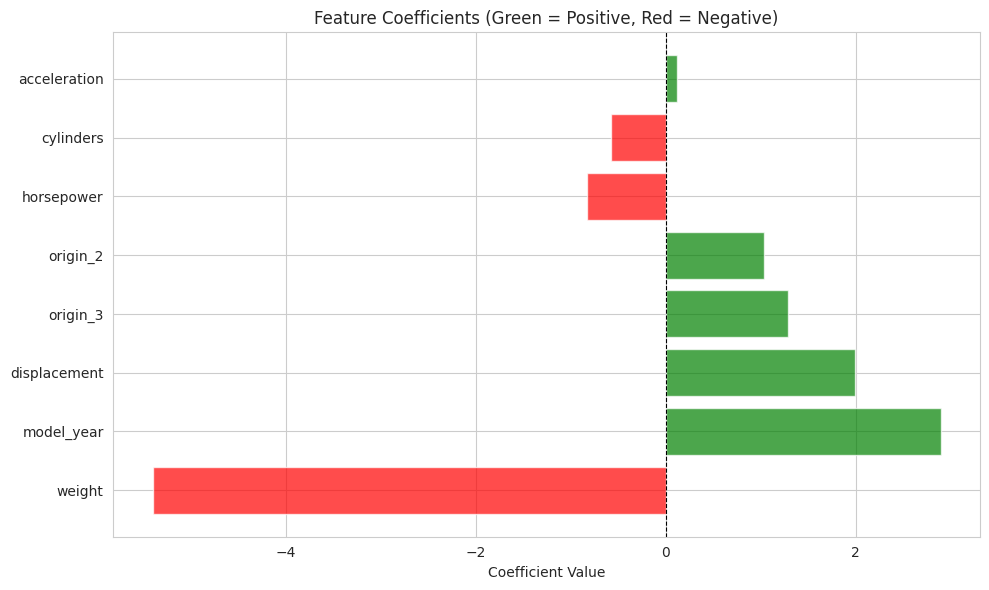

In [ ]:
# Bar plot of coefficients
plt.figure(figsize=(10, 6))
coefficients_sorted_signed = coefficients[coefficients_sorted.index]
colors = ['green' if x > 0 else 'red' for x in coefficients_sorted_signed]
plt.barh(range(len(coefficients_sorted_signed)),
         coefficients_sorted_signed.values, color=colors, alpha=0.7)
plt.yticks(range(len(coefficients_sorted_signed)), coefficients_sorted_signed.index)
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients (Green = Positive, Red = Negative)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

# Co-efficient Interpretattion

Based on the coefficients from our trained model, here are the features that contribute most to predicting MPG:

1. Weight (-5.4023): This is by far the strongest predictor with the largest magnitude coefficient. The negative coefficient indicates that as vehicle weight increases by one standard deviation, MPG decreases by approximately 5.4 units. Heavier vehicles consume significantly more fuel, making this the most important feature in our model.
2. Model Year (+2.8938): This is the second most important feature with a strong positive coefficient. For each standard deviation increase in model year (newer vehicles), MPG increases by approximately 2.9 units. This reflects technological improvements in fuel efficiency over time, as manufacturers developed better engines and lighter materials.
3. Displacement (+1.9929): Interestingly, displacement shows a positive coefficient of approximately 2.0. After accounting for weight, horsepower, and cylinders, larger displacement is associated with higher MPG. This could be due to multicollinearity - once we control for weight and other engine characteristics, displacement may capture efficiency aspects of engine design.
4. Origin_3 - Asia (+1.2875): Asian vehicles show approximately 1.3 units higher MPG compared to US vehicles (the reference category), after controlling for other factors. This suggests Asian manufacturers produced more fuel-efficient vehicles during this period.


# Key Insights:

1. The three dominant factors are weight (negative impact), model year (positive impact), and displacement (positive impact after controlling for other factors).
2. Vehicle weight alone accounts for more predictive power than any other single feature.
3. Regional differences (origin) play a meaningful role, with non-US vehicles showing better fuel efficiency.
4. Engine characteristics (horsepower, cylinders) have moderate negative impacts on fuel efficiency.


# Conclusion

1. The linear regression model demonstrates good predictive ability for automobile fuel efficiency.
2. The model successfully identifies the key determinants of MPG: vehicle weight (strongest negative factor), technological progress over time (model year), and regional manufacturing approaches (origin).
3. The standardized coefficients clearly show that reducing vehicle weight would have the most substantial impact on improving fuel economy, followed by leveraging newer vehicle technologies.

### Model Evaluation

#### Predictions

In [ ]:
# Make predictions on test set
y_pred = model.predict(X_test_scaled)

print("Predictions on test set:")
print(f"Number of predictions: {len(y_pred)}")
print(f"\nFirst 10 predictions vs actual values:")
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10],
    'Difference': y_test.values[:10] - y_pred[:10]
})
print(comparison_df)

Predictions on test set:
Number of predictions: 79

First 10 predictions vs actual values:
   Actual  Predicted  Difference
0    26.0  26.623086   -0.623086
1    21.6  26.902469   -5.302469
2    36.1  34.265982    1.834018
3    26.0  24.441176    1.558824
4    27.0  28.235414   -1.235414
5    28.0  30.182539   -2.182539
6    13.0   8.561005    4.438995
7    26.0  30.349163   -4.349163
8    19.0  20.381536   -1.381536
9    29.0  29.446287   -0.446287


#### Evaluation Metrics

In [ ]:
# Calculate R², MSE, and RMSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance Metrics:")
print("="*50)
print(f"R² Score:                     {r2:.4f}")
print(f"Mean Squared Error (MSE):     {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print("="*50)

# Additional context
print(f"\nTarget Variable (MPG) Statistics:")
print(f"  Mean: {y_test.mean():.2f}")
print(f"  Std:  {y_test.std():.2f}")
print(f"  Min:  {y_test.min():.2f}")
print(f"  Max:  {y_test.max():.2f}")
print(f"\nRMSE as % of mean: {(rmse / y_test.mean()) * 100:.2f}%")

Model Performance Metrics:
R² Score:                     0.7923
Mean Squared Error (MSE):     10.6023
Root Mean Squared Error (RMSE): 3.2561

Target Variable (MPG) Statistics:
  Mean: 22.84
  Std:  7.19
  Min:  10.00
  Max:  44.00

RMSE as % of mean: 14.26%


#### Visualise Predictions

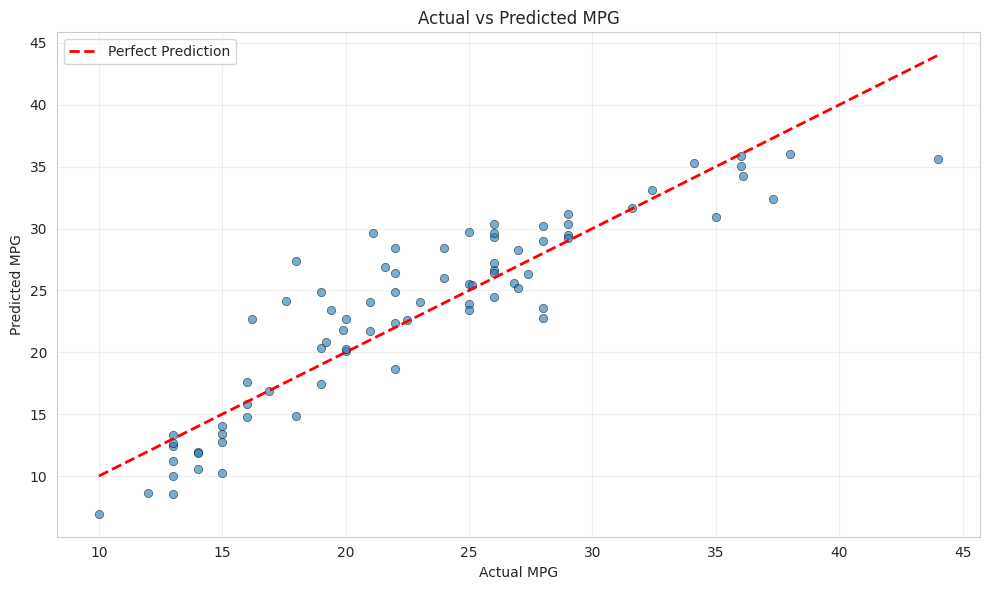

In [ ]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

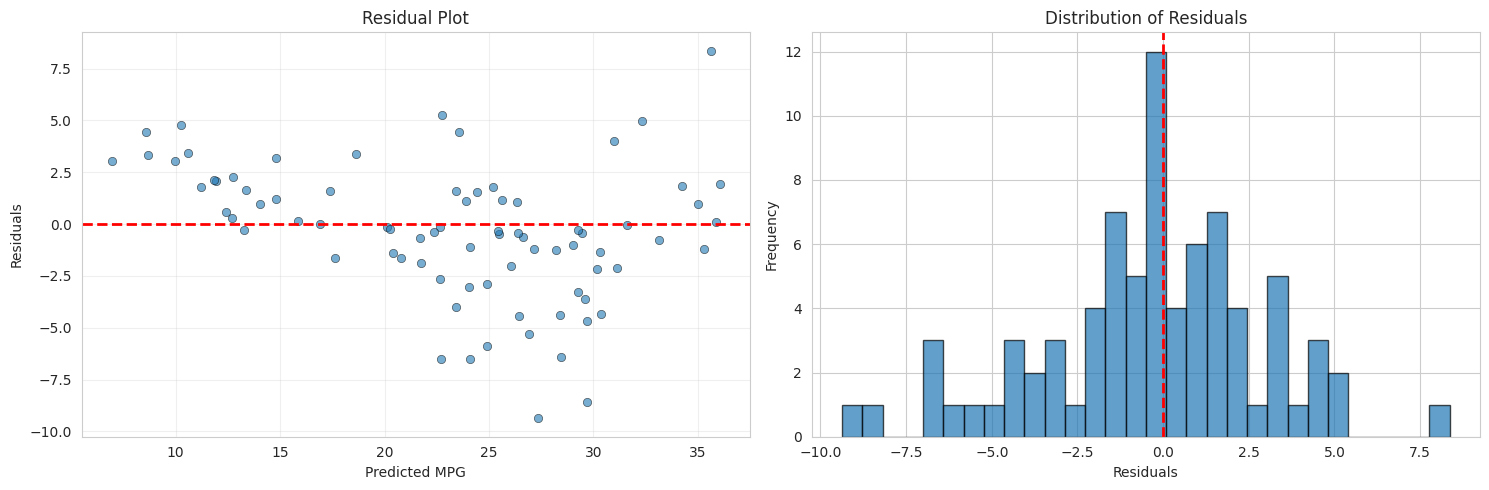

In [ ]:
# Residual plots
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Residual scatter plot
axes[0].scatter(y_pred, residuals, alpha=0.6, edgecolors='k', linewidth=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted MPG')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot')
axes[0].grid(True, alpha=0.3)

# Histogram of residuals
axes[1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals')
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

# Model Performance Interpretation

Based on your evaluation results, here's a comprehensive assessment of how well the model performed:

Overall Performance: **GOOD TO STRONG**

1. R² Score: 0.7923 (79.23%)
Our model explains approximately 79% of the variance in MPG, which represents good to strong performance for a linear regression model. This means that the features we selected (weight, model_year, displacement, horsepower, cylinders, acceleration, and origin) collectively account for nearly four-fifths of what determines a vehicle's fuel efficiency. The remaining 21% of variance is due to factors not captured by our model (such as aerodynamics, transmission type, driving conditions, or measurement error).

2. Root Mean Squared Error (RMSE): 3.26 MPG
The RMSE of 3.26 MPG represents the typical prediction error:
On average, predictions are off by about 3.3 MPG
Given that the test set has a mean of 22.84 MPG and ranges from 10 to 44 MPG, this error represents 14.26% of the mean
For practical purposes, this is reasonable accuracy - if predicting a car gets 25 MPG, the actual value is likely between 22-28 MPG
Most predictions fall within ±3-4 MPG of the actual value, which is acceptable for real-world applications

3. Visual Analysis of Predictions (Actual vs Predicted Plot):
  -  Strong linear relationship: Points cluster closely around the red diagonal line (perfect prediction line)
  -  Consistent accuracy across range: The model performs well for both low-MPG vehicles (10-20 MPG) and high-MPG vehicles (30-40 MPG)
  -  Few major outliers: Most predictions are close to actual values, with only occasional larger errors
No systematic bias: The model doesn't consistently over-predict or under-predict

4. Residual Analysis:
Your residual plots reveal important insights about model quality:
  -  Residual Plot (left):
Random scatter around zero: Residuals are fairly evenly distributed above and below the horizontal line at zero, which is ideal
No clear patterns: The lack of curved or funnel-shaped patterns indicates the linear model is appropriate (no major non-linear relationships were missed)
Constant variance (homoscedasticity): The spread of residuals appears relatively consistent across different predicted values, satisfying a key assumption of linear regression
A few outliers: There are some points with residuals around ±5-9 MPG, but these are relatively rare
  -   Distribution of Residuals (right):
Approximately normal distribution: The histogram shows a roughly bell-shaped, symmetric distribution centered near zero
Centered at zero: The peak is at 0, meaning predictions are unbiased overall (not systematically too high or too low)
Most errors are small: The majority of residuals fall within ±2.5 MPG, indicating good prediction accuracy for most vehicles

Model Strengths:

- High explanatory power: Capturing 79% of variance is strong for a real-world dataset
- Unbiased predictions: The model doesn't systematically over or under-predict
- Valid assumptions: Residuals show the linear regression assumptions are reasonably satisfied
- Practical accuracy: RMSE of 3.26 MPG is acceptable for most automotive applications
- Consistent performance: Works well across the entire range of MPG values (10-44)
- Interpretable features: Weight, model year, and displacement are clearly the dominant predictors

Model Limitations:

- Some prediction errors: About 14% average error means individual predictions can be off by several MPG
- Unexplained variance: 21% of MPG variation isn't captured, likely due to missing features (transmission type, tire pressure, aerodynamics, etc.)
- Occasional outliers: A few vehicles have errors of 5-9 MPG, suggesting some cars have unique characteristics not captured by the model
- Linear assumptions: The model assumes linear relationships, which may not perfectly capture complex interactions between features

Practical Implications:

- Reliable for comparisons: Great for comparing fuel efficiency between similar vehicles
- Good for trend analysis: Excellent for understanding how weight, year, and origin affect MPG
- Useful for screening: Can effectively identify fuel-efficient vs. fuel-inefficient vehicles
- Less precise for individuals: For any single vehicle, expect predictions within ±3-4 MPG of actual
- Better for typical vehicles: May be less accurate for unusual vehicles (very heavy/light, extreme performance cars)

# Conclusion

The model performs well and achieves its objectives. With an R² of 0.79 and RMSE of 3.26 MPG (14% of mean), the linear regression successfully captures the key determinants of fuel efficiency. The model correctly identifies that vehicle weight is the dominant factor (coefficient of -5.40), followed by technological improvements over time (model_year: +2.89) and regional manufacturing differences (origin).
For a baseline linear model using standard features, this represents solid, practical performance that would be useful for automotive analysis, consumer guidance, or policy evaluation. The residual analysis confirms that the linear modeling assumptions are reasonably met, giving us confidence in the model's validity.
If further improvement were needed, next steps could include: adding polynomial features to capture non-linear relationships, including interaction terms (e.g., weight × horsepower), or trying more sophisticated models like Ridge/Lasso regression to handle multicollinearity. However, for understanding and predicting automobile fuel efficiency with interpretable results, this linear regression model is effective and successful.

Used chatGPT to elaborate(make it sound better) on Interpretations.  